In [1]:
import numpy as np

# Create sample data
x = np.arange(0, 12*1024*1024)
temperature = np.zeros_like(x)
occurrence = np.zeros_like(x)
avg_temp = np.zeros_like(x)
# Stack data together
data = np.column_stack((x, temperature, occurrence,avg_temp))

# Save data to a .dat file
np.savetxt('map.dat', data, fmt='%d %d %d %d')

print("Data saved to data_file.dat successfully.")


Data saved to data_file.dat successfully.


In [ ]:
import numpy as np
from tqdm import tqdm  # Import tqdm for progress tracking

# Load data from map.dat
map_data = np.loadtxt('map.dat')

# Load data from temperature.dat
temperature_data = np.loadtxt('temperature.dat')

# Create a 2D array 'map' with columns: pixel, temperature, occurrence, avg_temp
map_array = np.zeros((len(map_data), 4), dtype=float)
map_array[:, 0] = map_data[:, 0]  # pixel
map_array[:, 1] = map_data[:, 1]  # temperature
map_array[:, 2] = map_data[:, 2]  # occurrence
map_array[:, 3] = map_data[:, 3]  # avg_temp

# Create a 2D array 'temperature' with columns: time, pixel, temperature
temperature_array = np.zeros((len(temperature_data), 3), dtype=float)
temperature_array[:, 0] = temperature_data[:, 0]  # time
temperature_array[:, 1] = temperature_data[:, 1]  # pixel
temperature_array[:, 2] = temperature_data[:, 2]  # temperature

# Update map array based on temperature array
for time, pixel, temperature in tqdm(temperature_array, desc="Updating map array"):
    idx=int(pixel)
    # Update temperature and occurrence
    map_array[idx, 1] += temperature
    map_array[idx, 2] += 1

# Calculate avg_temp
for i in tqdm(range(len(map_array)), desc="Calculating avg_temp"):
    if map_array[i, 2] != 0:  # Avoid division by zero
        map_array[i, 3] = map_array[i, 1] / map_array[i, 2]

# Save the updated map array to a .dat file
formats = ['%d', '%.4f', '%d', '%.4f']
np.savetxt('final_map.dat', map_array, fmt=formats)

print("Updated map data saved to updated_map.dat successfully.")


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


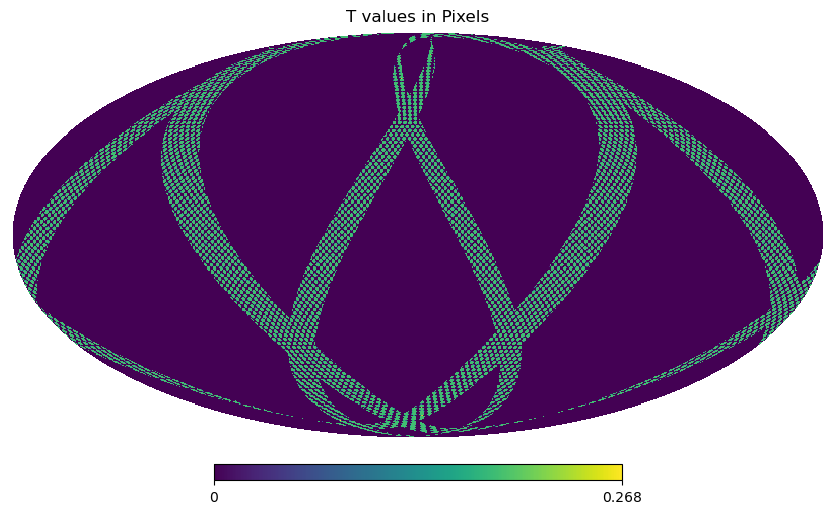

In [1]:
import numpy as np
import healpy as hp

# Read the .dat file and extract pixel and t values
file_path = 'days_map.dat'
pixels = []
t_values = []

with open(file_path, 'r') as file:
    for line in file:
        data = line.strip().split()
        pixel_value = int(float(data[0]))  # Convert float to int
        t_value = float(data[3])            # Keep it as float
        pixels.append(pixel_value)
        t_values.append(t_value)

# Prepare the Healpy map
nside = 1024  # Choose the resolution of the Healpy map
npix = hp.nside2npix(nside)
map_values = np.zeros(npix)

# Assign t values to corresponding pixels
for pixel, t in zip(pixels, t_values):
    map_values[pixel] = t

# Plot the Healpy map
hp.mollview(map_values, nest=True, title='T values in Pixels')
